# Dog breed classification #

Welcome to this assignment. In this asignment you will try to predict the type of dog (breed).<br>

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/generated_dogs.csv'
'''
The dataset consists of 10000 dogs who died of old age. It is generated using meta data from dogs.

'''
df = pd.read_csv(url)
df.head()

,Breed,Gender,Age_time_of_death,Height,Weight,Likes,Skills
0,Border Collie,Male,13.3,20.70,40.50,likes_people_better_than_dogs,high_trainability
1,Basset Hound,Male,12.7,13.65,51.02,likes_dogs_better_than_people,no_special_skills
2,Dachshund,Female,14.0,8.59,24.58,likes_dogs_better_than_people,barks_like_hell
3,Boston Terrier,Male,12.3,16.27,20.13,likes_people_better_than_dogs,no_special_skills
4,Chihuahua,Male,15.3,7.14,5.92,likes_dogs_better_than_people,barks_like_hell


# First step #


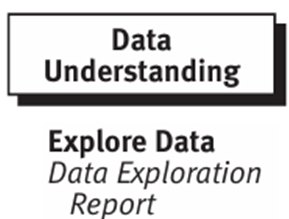


I will help you a little bit. We could try a pairplot.

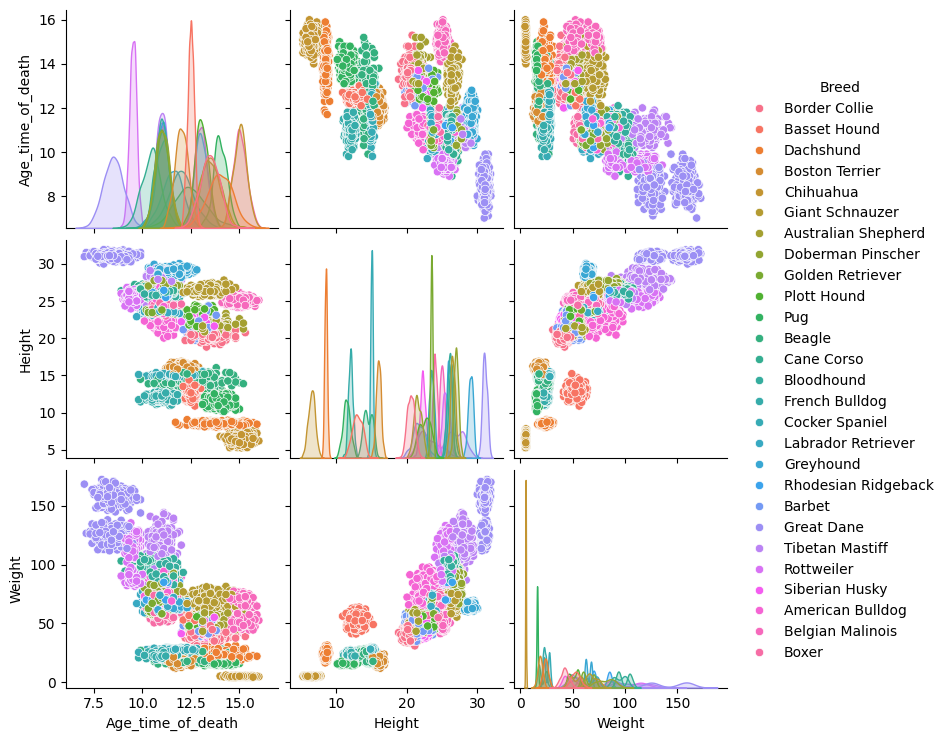

In [2]:
import seaborn as sns

sns.pairplot(df.drop(['Gender','Skills','Likes'],axis=1), hue='Breed')

1) Try different visualisations

# Second step #

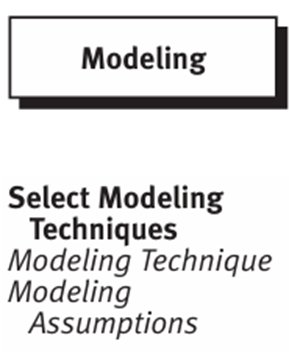

1) Select different models

# Third step #

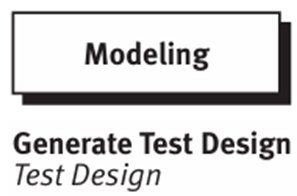

1) use scaling or not, drop columns or not, use _get_dummies or not.
2) Split your dataset in training, validation, and test.

# Fourth step #

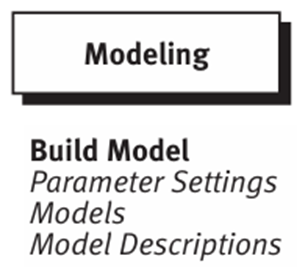

1) Apply your models.

# Fifth step #
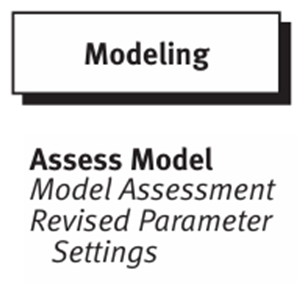

1) Assess your models.

# And repeat!!!! #
1) Go back to 1st, 2nd or 3rd step and improve your results!



In [3]:
# step 1: data viaualization 
# from matplotlib import pyplot as plt
# import seaborn as sns
# from pandas.plotting import scatter_matrix
# sns.boxenplot(x='breed', y='height', data=df) 
# plt.show()

# plt.figure()
# sns.boxenplot(x='breed', y='weight', data=df)
# plt.show()
# plt.figure()
# sns.boxenplot(x='breed', y='age_time_of_death', data=df)
# plt.show()
# plt.figure()

# df['breed_encoded'] = df['breed'].astype('category').cat.codes
# df.head()
# corr = df[["breed_encoded","height","weight","age_time_of_death"]].corr()

# # sns.pointplot(x='breed_encoded', y='weight', data=df)
# sns.countplot(x='breed', data=df)
# plt.show()
# sns.heatmap(corr, annot=true)
# plt.show()
# plt.figure()
# sns.catplot(x='height', y='age_time_of_death', data=df, hue="breed", kind="box")

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt


def test_models (df,y_col, model_grids,options):
    results = {}

    X = df.drop(columns=[y_col])
    y = df[y_col]

    fig, axis = plt.subplots(len(options),len(model_grids), )

    #try all the options provided
    for i, option in enumerate(options):
        if option['dummys'] == True:
            X = pd.get_dummies(X, drop_first=True)

        if option['scaling'] == True:
            scaler = StandardScaler()
            scaler.fit(X)
            X_temp = scaler.transform(X)
            X = pd.DataFrame(X_temp, columns=X.columns)

        X = X.drop(columns=option['cols_to_drop'])

        #split the data
        X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.9, random_state=42)

        #trainding and testing different models and hyperparameters
        for j,(name,setup) in enumerate(model_grids.items()):
            print(f'Testing model: {name}')

            grid_search = GridSearchCV(
                estimator=setup['model'], 
                param_grid=setup['params'], 
                cv=5, 
                scoring='accuracy', 
                n_jobs=-1 # Gebruik alle processorkernen voor snelheid
            )
        
            # Resultaten opslaan
            results[name] = {
                'best_score': grid_search.best_score_,
                'best_params': grid_search.best_params_,
                'best_estimator': grid_search.best_estimator_,
                'all': grid_search.cv_results_
            }
    
            print(f"Beste score: {results[name]['best_score']:.4f}\n")
            best_model_name = max(results, key=lambda x: results[x]['best_score'])
            best_estimator = results[best_model_name]['best_estimator']
            best_params = results[best_model_name]['best_params']
            print(f"the best params are: {best_params}")

            model = best_estimator
            model.fit(X_train, y_train)                                                     # train the model
            pred = model.predict(X_validation)
            ConfusionMatrixDisplay.from_predictions(y_validation, pred, ax=axis[i,j])
            acc = accuracy_score(y_validation, pred)

            # styling
            if j == 0:
                axis[i,j].text(s=f'optionNr: {i}', x=-0.3, y=0.5, rotation=90, size=20, transform=axis[i,j].transAxes)
            if i == 0:
                axis[i,j].set_title(f'model: {name}', size=16)
            
            plt.text(s=f'accuracy:{acc:.3f}' , x=0.5, y=-0.1, size=12, ha='center', transform=axis[i,j].transAxes)


    #     model.fit(X_train, y_train)                                                     # train the model
    #     pred = model.predict(X_validation)
    #     ConfusionMatrixDisplay.from_predictions(y_validation, pred, ax=ax)



    #     acc=accuracy_score(y_validation, pred)
    #     print ('accuracy is :',acc)
    #     return acc

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.pipeline import Pipeline

def test_models(df, y_col, model_grids, options):
    all_results = {}
    
    # split llabels and features
    X_original = df.drop(columns=[y_col])
    y = df[y_col]

    # split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X_original, y, test_size=0.2, random_state=42)
    X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


    # loop through all the options
    for i, option in enumerate(options):
        option_key = f"Option_{i}"
        

        categorical_features = X_original.select_dtypes(include=['object', 'category']).columns.tolist()
        numerical_features = X_original.select_dtypes(include=['number']).columns.tolist()

    
        transformers = []

        # add numarical values with or without scaling
        if option['scaling'] == True:
            transformers.append(('scaler', StandardScaler(), numerical_features))
        else:
            transformers.append(('num_pass', 'passthrough', numerical_features))

       # add categorical values with or without dummification
        if option['dummys'] == True:
            # Gebruik OneHotEncoder met drop_first=True
            transformers.append(('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features))
        # else:
            # Voeg een 'passthrough' toe zodat categorische kolommen behouden blijven
            # transformers.append(('cat_pass', 'passthrough', categorical_features))

        # meka preprocessor
        preprocessor = ColumnTransformer(transformers=transformers, remainder='drop')
        



        # Filter de kolommen die gedropt moeten worden NA de dummificatie/scaling
        # Dit is complexer in een pipeline. Voor nu, we droppen ze uit de originele set
        # en bouwen de pipeline opnieuw, of we laten de pipeline ze droppen (simpelste).
        # We droppen de kolommen bij de start, maar voor een werkende pipeline:
        
        # --- Vereenvoudiging: We laten de ColumnTransformer de filtering doen ---
        # (Dit is de meest veilige methode in een pipeline)
        
        # loop trough the models and select the best hyper parameters
        temp_best_model_overall = None
        temp_best_score_overall = -1

        for j, (name, setup) in enumerate(model_grids.items()):
            model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('classifier', setup['model'])])
            
            pipeline_params = {f'classifier__{k}': v for k, v in setup['params'].items()}

            print(f'\n{option_key} - Testing model: {name}')

            grid_search = GridSearchCV(
                estimator=model_pipeline, 
                param_grid=pipeline_params, 
                cv=5, 
                scoring='accuracy', 
                n_jobs=-1
            )
            
            #run all the models
            grid_search.fit(X_train, y_train) 

            # save the results
            all_results[f'{option_key}_{name}'] = {
                'best_score': grid_search.best_score_,
                'best_params': grid_search.best_params_,
                'best_estimator': grid_search.best_estimator_,
            }
            
            
            current_score = grid_search.best_score_
            print(f"Beste score: {current_score:.4f}")
            
            if current_score > temp_best_score_overall:
                temp_best_score_overall = current_score
                temp_best_model_overall = grid_search.best_estimator_
                
        # --- Stap 3: Evaluatie en Visualisatie (na de model lus) ---
        # Je tekent de confusion matrix voor HET BESTE MODEL dat in deze 'option' ronde gevonden is.
        
        # We gebruiken het beste model gevonden in DEZE specifieke OPTIE
        model_to_plot = temp_best_model_overall
        
        # Voorspel op de validatieset (X_validation, die we buiten de pipeline hebben gehouden)
        # Omdat het beste model in de pipeline zit, doet deze automatisch de pre-processing
        pred = model_to_plot.predict(X_validation) 
        
        acc = accuracy_score(y_validation, pred)
        
        # Dit deel van de code is nu veel te complex om direct in een functie te zetten
        # vanwege de as-indexering (i, j). We moeten de figuur BINNEN de binnenste lus tekenen
        # of de figuurstructuur (len(options) x len(model_grids)) behouden. 
        
        # --- Vereenvoudiging van de plot: Teken alleen de winnaar van de optie ---
        
        # Teken de CM van de winnaar van deze optie (optie i)
        plt.figure(figsize=(8, 8))
        ConfusionMatrixDisplay.from_predictions(y_validation, pred, cmap=plt.cm.Blues)
        plt.title(f"Winnaar van Optie {i}: {temp_best_model_overall.steps[-1][0]} (Acc: {acc:.3f})", size=16)
        plt.show()

    return all_results


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def generate_heatmap_data(all_results, metric='max'):
    """
    Genereert een DataFrame voor de heatmap en een dictionary voor custom annotaties.
    
    :param all_results: Dictionary van de vorm {'Option_i_ModelName': {...}}
    :param metric: 'max', 'min', of 'avg' (gemiddelde van alle geteste grid scores)
    :returns: DataFrame voor de heatmap, Dict met de beste parameter-index
    """
    heatmap_df = pd.DataFrame()
    annotation_idx = {}
    
    for key, result in all_results.items():
        # Extrahier Optie en ModelNaam
        option_key, model_name = key.rsplit('_', 1) 
        
        # cv_results_ bevat de scores van alle parametercombinaties
        cv_scores = result['all']['mean_test_score']
        
        # Bepaal de aggregatie en annotatie index
        if metric == 'max':
            score = np.max(cv_scores)
            idx = np.argmax(cv_scores)
        elif metric == 'min':
            score = np.min(cv_scores)
            idx = np.argmin(cv_scores)
        elif metric == 'avg':
            score = np.mean(cv_scores) # Gemiddelde score van alle geteste combinaties
            idx = 'AVG' # Geen specifieke index nodig
        else:
            raise ValueError("Metric moet 'max', 'min' of 'avg' zijn.")
            
        # Voeg de score toe aan de DataFrame
        heatmap_df.loc[option_key, model_name] = score
        
        # Sla de index op voor custom annotatie (alleen relevant bij min/max)
        annotation_idx[(option_key, model_name)] = idx

    return heatmap_df, annotation_idx

def plot_custom_heatmap(heatmap_df, annotation_idx, metric='max'):
    # 1. Bepaal de globale winnaar (voor de groene omranding)
    global_best_score = heatmap_df.max().max()
    
    # 2. Maak de plot
    fig, ax = plt.subplots(figsize=(heatmap_df.shape[1] * 2, heatmap_df.shape[0] * 2))
    
    # Gebruik Seaborn voor de basis heatmap
    sns.heatmap(heatmap_df, 
                annot=False,  # Zelf annoteren, dus False
                fmt=".3f", 
                cmap="viridis", 
                cbar_kws={'label': f'{metric.capitalize()} Nauwkeurigheid'}, 
                ax=ax)

    # 3. Voeg custom annotatie en highlighting toe
    for (i, j), score in np.ndenumerate(heatmap_df.values):
        option_key = heatmap_df.index[i]
        model_name = heatmap_df.columns[j]
        
        # Haal de hyperparameter index op (indien relevant)
        if metric in ['max', 'min']:
            hyperparam_idx = annotation_idx.get((option_key, model_name), '-')
        else:
            hyperparam_idx = '-'

        # A. Hoofdscore (Percentage)
        ax.text(j + 0.5, i + 0.35, f'{score:.2%}',
                ha='center', va='center', color='white', fontsize=12, weight='bold')

        # B. Hyperparameter Index (Klein)
        if hyperparam_idx != '-':
            ax.text(j + 0.5, i + 0.65, f'#{hyperparam_idx}',
                    ha='center', va='center', color='lightgray', fontsize=7)
        
        # C. Groene Omranding voor het beste resultaat
        if score == global_best_score:
            # We moeten controleren op gelijke scores (meerdere winnaars)
            if np.isclose(score, global_best_score):
                rect = patches.Rectangle((j, i), 1, 1, 
                                         linewidth=4, 
                                         edgecolor='limegreen', 
                                         facecolor='none')
                ax.add_patch(rect)
                
    ax.set_title(f'Nauwkeurigheid van Modellen per Voorbewerkingsoptie ({metric.capitalize()})', fontsize=16, pad=15)
    ax.set_xlabel("Model", fontsize=14)
    ax.set_ylabel("Data Voorbewerkingsoptie", fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# --- VOORBEELD GEBRUIK (Aannemend dat all_results gevuld is) ---
# De resultaten uit jouw testfunctie moeten in dit formaat zijn:
# example_results = {
#     'Option_0_DecisionTree': {'best_score': 0.82, 'all': {'mean_test_score': [0.75, 0.82, 0.80], 'params': [...]}},
#     'Option_0_KNN': {'best_score': 0.85, 'all': {'mean_test_score': [0.85, 0.81, 0.79], 'params': [...]}},
#     # ... meer modellen ...
# }

# heatmap_data, annotation_indices = generate_heatmap_data(all_results, metric='max')
# plot_custom_heatmap(heatmap_data, annotation_indices, metric='max')

# # Voorbeeld voor de gemiddelde score:
# # avg_data, avg_idx = generate_heatmap_data(all_results, metric='avg')
# # plot_custom_heatmap(avg_data, avg_idx, metric='avg')

In [11]:
import warnings
from sklearn.exceptions import ConvergenceWarning
def run_experiment(df, y_col, model_grids, options):
    all_results = {}
    
    # Loop door alle preprocessing opties
    for i, option in enumerate(options):
        opt_name = f"Opt{i}_S{'1' if option['scaling'] else '0'}_D{'1' if option['dummys'] else '0'}"
        print(f"\n=== Bezig met {opt_name} ===")
        
        
        X = df.drop(columns=[y_col] + option['cols_to_drop'])
        y = df[y_col]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
        num_cols = X.select_dtypes(include=['number']).columns.tolist()
        
        transformers = []
        
        # Scaling logica
        if option['scaling']:
            transformers.append(('num', StandardScaler(), num_cols))
        else:
            transformers.append(('num', 'passthrough', num_cols))
            
        # Dummy/Encoding logica
        if option['dummys']:
            # OneHotEncoder voor dummys (handle_unknown voorkomt errors bij nieuwe categorieën)
            transformers.append(('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols))
        # else:
        #     # OrdinalEncoder zorgt dat tekst -> getallen wordt (nodig voor SVM/KNN!)
        #     transformers.append(('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols))
            
        preprocessor = ColumnTransformer(transformers=transformers)
        
        # 5. Loop door alle modellen
        for model_name, config in model_grids.items():
            print(f"   -> GridSearch voor {model_name}...")
            model_instance = config['model']

            if hasattr(model_instance, 'random_state'):
                model_instance.random_state = 42
            
            # Pipeline maken: Eerst preprocessor, dan het model
            clf = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', model_instance)
            ])
            
            # Parameters hernoemen voor de pipeline (classifier__param_naam)
            pipe_params = {f'classifier__{k}': v for k, v in config['params'].items()}
            
            # GridSearch instellen
            grid = GridSearchCV(clf, pipe_params, cv=5, scoring='accuracy', n_jobs=10)
            
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=ConvergenceWarning)
                
                grid.fit(X_train, y_train)
            
            
            # Resultaten opslaan
            key = f"{opt_name}_{model_name}"
            all_results[key] = {
                'best_score': grid.best_score_,      # CV Score
                'best_params': grid.best_params_,
                'best_estimator': grid.best_estimator_,
                'cv_results': grid.cv_results_
            }
            
    return all_results

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

model_grids = {
    'DecisionTree': {
        'model': tree.DecisionTreeClassifier(),
        'params': {'max_depth': [3, 5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9, 15], 'weights': ['uniform', 'distance']}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
    },
    'SVM': {
        'model': svm.SVC(max_iter=2000),
        'params': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]} 
    }
}

options = [
    {'scaling': False, 'dummys': False, 'cols_to_drop': []},
    {'scaling': True,  'dummys': False, 'cols_to_drop': []},
    {'scaling': False, 'dummys': True,  'cols_to_drop': []},
    {'scaling': True,  'dummys': True,  'cols_to_drop': []}
]

results = run_experiment(df,'Breed', model_grids, options)


=== Bezig met Opt0_S0_D0 ===
   -> GridSearch voor DecisionTree...
   -> GridSearch voor KNN...
   -> GridSearch voor RandomForest...
   -> GridSearch voor SVM...

=== Bezig met Opt1_S1_D0 ===
   -> GridSearch voor DecisionTree...
   -> GridSearch voor KNN...
   -> GridSearch voor RandomForest...
   -> GridSearch voor SVM...

=== Bezig met Opt2_S0_D1 ===
   -> GridSearch voor DecisionTree...
   -> GridSearch voor KNN...
   -> GridSearch voor RandomForest...
   -> GridSearch voor SVM...

=== Bezig met Opt3_S1_D1 ===
   -> GridSearch voor DecisionTree...
   -> GridSearch voor KNN...
   -> GridSearch voor RandomForest...
   -> GridSearch voor SVM...


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import json

def plot_heatmap(all_results, metric='max', target_model=None):
    """
    Plots a heatmap of model results.
    
    :param all_results: Dictionary met resultaten van run_experiment
    :param metric: 'max' of 'avg' score om te plotten
    :param target_model: (Optioneel) String naam van een model (bv. 'RandomForest') 
                         voor gedetailleerde analyse van de beste prestatie.
    """
    data = {}
    annot_indices = {}
    
    # 1. Data structureren voor de heatmap
    for key, val in all_results.items():
        # Key format is bijv: "Opt1_S1_D0_RandomForest"
        # We splitsen op de laatste underscore om modelnaam te scheiden
        opt_full, mod = key.rsplit('_', 1) 
        
        scores = val['cv_results']['mean_test_score']
        
        if metric == 'max':
            score = np.max(scores)
            idx = np.argmax(scores)
        elif metric == 'avg':
            score = np.mean(scores)
            idx = '-'
            
        if opt_full not in data: data[opt_full] = {}
        data[opt_full][mod] = score
        annot_indices[(opt_full, mod)] = idx

    df_heat = pd.DataFrame(data).T 
    
    # 2. De Heatmap Plotten
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(df_heat, annot=False, cmap='viridis', fmt='.1%', ax=ax, cbar_kws={'label': 'Accuracy'})
    
    global_max = df_heat.max().max()
    
    for i, row_val in enumerate(df_heat.index):
        for j, col_val in enumerate(df_heat.columns):
            score = df_heat.loc[row_val, col_val]
            idx = annot_indices.get((row_val, col_val), '')
            
            # Tekst: Percentage
            ax.text(j+0.5, i+0.4, f"{score:.1%}", ha='center', va='center', color='white', weight='bold', size=10)
            # Tekst: Param index
            if idx != '-':
                ax.text(j+0.5, i+0.7, f"cfg:{idx}", ha='center', va='center', color='lightgrey', fontsize=8)
            
            # Groene rand om de globale winnaar
            if np.isclose(score, global_max):
                rect = patches.Rectangle((j, i), 1, 1, linewidth=4, edgecolor='#39FF14', facecolor='none')
                ax.add_patch(rect)

    ax.set_title(f"Model Performance ({metric})", size=14)
    ax.set_xlabel("Model Type")
    ax.set_ylabel("Preprocessing Optie")
    plt.tight_layout()
    plt.show()

    # 3. (NIEUW) Detail Analyse voor specifiek model
    if target_model:
        print(f"\n{'='*60}")
        print(f"🔎 DETAIL ANALYSE VOOR: {target_model.upper()}")
        print(f"{'='*60}")
        
        # Filter resultaten voor dit model
        model_results = {k: v for k, v in all_results.items() if k.endswith(f"_{target_model}")}
        
        if not model_results:
            print(f"⚠️ Geen resultaten gevonden voor model: '{target_model}'. Check de spelling.")
            return

        # Zoek de beste run voor dit specifieke model
        best_key = max(model_results, key=lambda k: model_results[k]['best_score'])
        best_run = model_results[best_key]
        
        # Informatie extraheren
        opt_name = best_key.rsplit('_', 1)[0] # Haal 'OptX_...' deel op
        score = best_run['best_score']
        raw_params = best_run['best_params']
        
        # Parameters opschonen (verwijder 'classifier__' prefix)
        clean_params = {k.replace('classifier__', ''): v for k, v in raw_params.items()}

        print(f"🏆 Beste Prestatie:")
        print(f"   • Score:           {score:.4f} ({score:.1%})")
        print(f"   • Gevonden bij:    {opt_name}")
        print(f"------------------------------------------------------------")
        print(f"⚙️  Winnende Hyperparameters:")
        # Mooi printen van de dictionary
        print(json.dumps(clean_params, indent=4))
        print(f"{'='*60}\n")